# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [3]:
train_df = pd.read_csv("input_data/train.csv")
print("lines, columns = ",str(train_df.shape))
data_type = train_df.dtypes.reset_index()
data_type.columns = ["Column name", "Type"]
data_type

lines, columns =  (891, 12)


,Column name,Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


# Analyzing data

## Detecting NaN

In [4]:
nan = train_df.isnull().sum()
nan[nan != 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

## Class/Survived

In [5]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## SibSp/Survived

In [6]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


## Parch/Survived

In [7]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Sex/Survived

In [8]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


## Age&Sex/Survived

In [32]:
age_sex_survived = train_df[["Age", "Sex","Survived"]].dropna()
age_intervals = [index*10 for index in range(int(train_df["Age"].max()/10)+1)]
age_sex_survived["Age interval"] = pd.cut(age_sex_survived["Age"], age_intervals)
age_sex_survived[["Age interval","Survived"]].groupby(["Age interval"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Age interval,Survived
0,"(0, 10]",0.593750
3,"(30, 40]",0.445161
5,"(50, 60]",0.404762
4,"(40, 50]",0.383721
1,"(10, 20]",0.382609
2,"(20, 30]",0.365217
6,"(60, 70]",0.235294
7,"(70, 80]",0.200000


## Age&Male/Survived

In [29]:
age_male_survived = age_sex_survived[age_sex_survived["Sex"] == "male"]
age_male_survived[["Age interval","Survived"]].groupby(["Age interval"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Age interval,Survived
0,"(0, 10]",0.575758
3,"(30, 40]",0.230000
4,"(40, 50]",0.218182
7,"(70, 80]",0.200000
2,"(20, 30]",0.154362
1,"(10, 20]",0.144928
5,"(50, 60]",0.142857
6,"(60, 70]",0.071429


## Age&FeMale/Survived

In [11]:
age_female_survived = age_sex_survived[age_sex_survived["Sex"] != "male"]
age_female_survived[["Age interval","Survived"]].groupby(["Age interval"], as_index=False) \
.mean().sort_values(by="Survived",ascending=False)

,Age interval,Survived
6,"(60, 70]",1.000000
5,"(50, 60]",0.928571
3,"(30, 40]",0.836364
2,"(20, 30]",0.753086
1,"(10, 20]",0.739130
4,"(40, 50]",0.677419
0,"(0, 10]",0.612903
7,"(70, 80]",NaN


## Survival with respect to age intervals from last lesson

In [37]:
df_age_intervals = train_df[["Age", "Survived", "Sex"]].dropna()
age_intervals = [index*10 for index in range(9)]
df_age_intervals['age_intervals'] = pd.cut(df_age_intervals['Age'], age_intervals)

Text(0.5, 0, 'name')

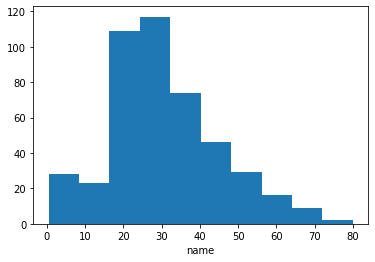

In [38]:
plt.hist(df_age_intervals[df_age_intervals["Sex"] == "male"]["Age"])
plt.xlabel("name")